In [2]:
using Plots

In [12]:
function generate_noisy_sinusoid(A, f, phi, noise_std, num_samples)
    t = 0:1/(num_samples-1):1
    clean_signal = A * sin.(2 * π .* f .* t .+ phi)
    noisy_signal = clean_signal + noise_std * randn(num_samples)
    return noisy_signal, clean_signal
end

generate_noisy_sinusoid (generic function with 1 method)

In [13]:
function lms_algorithm(input_signal, desired_output, mu, num_taps)
    num_samples = length(input_signal)
    weights = zeros(num_taps)
    estimated_output = zeros(num_samples)

    for n in num_taps:num_samples
        x = input_signal[n-num_taps+1:n]
        y_hat = dot(weights, x)
        error = desired_output[n] - y_hat
        weights .+= mu * error * x
        estimated_output[n] = y_hat
    end

    return estimated_output
end

lms_algorithm (generic function with 1 method)

In [14]:
# Parameters
A = 1.0          # Amplitude of the sinusoid
f = 5.0          # Frequency of the sinusoid
phi = π/4        # Phase of the sinusoid
noise_std = 0.2  # Standard deviation of noise
num_samples = 1000
mu = 0.01        # LMS step size
num_taps = 10    # Number of filter taps


10

In [19]:
# Generate a noisy sinusoidal signal
noisy_signal, clean_signal = generate_noisy_sinusoid(A, f, phi, noise_std, num_samples);

In [17]:
using LinearAlgebra

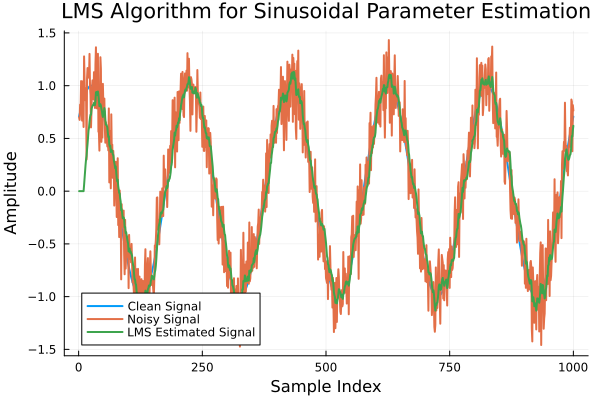

In [18]:
# Apply LMS algorithm to estimate sinusoidal parameters
estimated_signal = lms_algorithm(noisy_signal, clean_signal, mu, num_taps)

# Plot the results
plot([clean_signal, noisy_signal, estimated_signal],
     label=["Clean Signal" "Noisy Signal" "LMS Estimated Signal"],
     xlabel="Sample Index",
     ylabel="Amplitude",
     title="LMS Algorithm for Sinusoidal Parameter Estimation",
     linewidth=2)
